### Bag of Word  Machine Learning Performance

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Load Data

https://www.kaggle.com/rchitic17/real-or-fake

In [4]:
#Read Data
df=pd.read_csv('fake_or_real_news.csv')
df.shape

(6335, 4)

In [5]:
df['Nlabel'] = np.where((df['label']=='FAKE') , 0, 1)

In [6]:
df.head(10)

,Unnamed: 0,title,text,label,Nlabel
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,0
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,0
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,1
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,1
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,1


In [7]:
# Drop Nan Value
df=df.dropna()
df.shape

(6335, 5)

In [8]:
X=df.drop('Nlabel',axis=1)
y=df['Nlabel']

In [9]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.shape

(6335, 6)

### Data Preprocessing

In [10]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
## Bag of Words feature extraction
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
## Independent Features
X = cv.fit_transform(corpus).toarray()
## Dependent Features
y=messages['Nlabel']

### Data Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Machine Learning Algorithms

## Naive Bayes  : BernoulliNB

accuracy:   0.817680
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       615
           1       0.81      0.84      0.83       652

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267



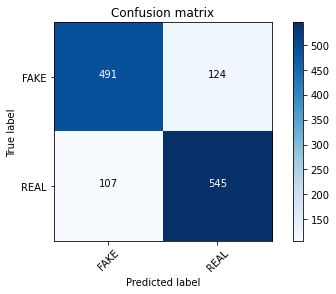

In [13]:
from sklearn.naive_bayes import BernoulliNB
bern=BernoulliNB(alpha = 0.01)
bern.fit(X_train, y_train)
pred_bern = bern.predict(X_test)
score_bern = metrics.accuracy_score(y_test, pred_bern)
print("accuracy:   %f" % score_bern)
cm_bern = metrics.confusion_matrix(y_test, pred_bern)
plot_confusion_matrix(cm_bern ,classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_bern))

### Logistic Regression

accuracy:   0.839779
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       615
           1       0.86      0.83      0.84       652

    accuracy                           0.84      1267
   macro avg       0.84      0.84      0.84      1267
weighted avg       0.84      0.84      0.84      1267



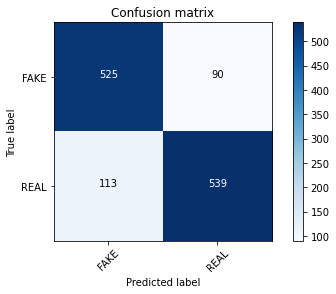

In [14]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1, solver='newton-cg')
LR.fit(X_train,y_train)
pred_lr=LR.predict(X_test)
score_lr = metrics.accuracy_score(y_test, pred_lr)
print("accuracy:   %f" % score_lr)
cm_lr = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm_lr, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_lr))

### Decision Tree

accuracy:   0.748224
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       615
           1       0.76      0.75      0.76       652

    accuracy                           0.75      1267
   macro avg       0.75      0.75      0.75      1267
weighted avg       0.75      0.75      0.75      1267



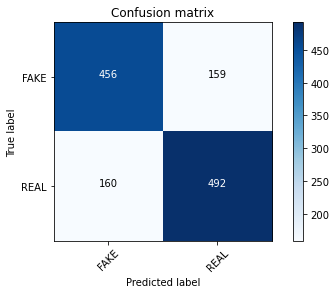

In [24]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = None, max_leaf_nodes = None, 
                            min_samples_split = 2, min_samples_leaf = 1 )
DT.fit(X_train, y_train)
pred_dt = DT.predict(X_test)
score_dt = metrics.accuracy_score(y_test, pred_dt)
print("accuracy:   %f" % score_dt)
cm_dt = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm_dt, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_dt))

### Random Forest

accuracy:   0.807419
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       615
           1       0.83      0.79      0.81       652

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



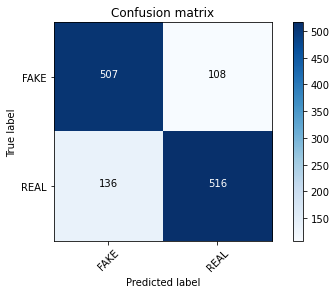

In [28]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100, max_depth = None, min_samples_split = 2,
                             min_samples_leaf = 1, max_leaf_nodes = None )
RFC.fit(X_train, y_train)
pred_rfc=RFC.predict(X_test)
score_rfc = metrics.accuracy_score(y_test, pred_rfc)
print("accuracy:   %f" % score_rfc)
cm_rfc = metrics.confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(cm_rfc, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_rfc))

### Support Vector Machine

accuracy:   0.820047
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       615
           1       0.83      0.82      0.82       652

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267



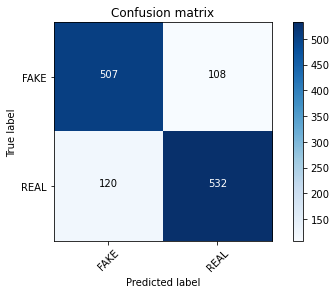

In [29]:
from sklearn import  svm
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train, y_train)
pred_svm=SVM.predict(X_test)
score_svm = metrics.accuracy_score(y_test, pred_svm)
print("accuracy:   %f" % score_svm)
cm_svm = metrics.confusion_matrix(y_test, pred_svm)
plot_confusion_matrix(cm_svm, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_svm))

### ANN: MLPClassifier

accuracy:   0.820
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       615
           1       0.83      0.82      0.82       652

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267



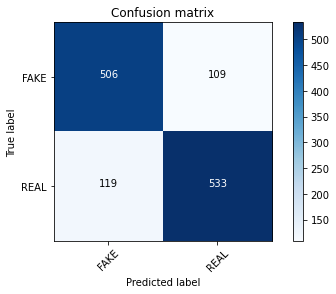

In [30]:
from sklearn.neural_network import MLPClassifier
MLPClassifierModel = MLPClassifier(activation='logistic', solver='lbfgs', 
                                   early_stopping= False, alpha= 1 ,hidden_layer_sizes=(100))
MLPClassifierModel.fit(X_train, y_train)
pred_mlp=MLPClassifierModel.predict(X_test)
score_mlp= metrics.accuracy_score(y_test, pred_mlp)
print("accuracy:   %0.3f" % score_mlp)
cm_mlp = metrics.confusion_matrix(y_test, pred_mlp)
plot_confusion_matrix(cm_mlp, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_mlp))